In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from sklearn.metrics import r2_score

In [2]:
# Load the autoreload extension
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# Imported the module
from Model_CAR_NK import Model_obj_CAR_NK as obj_CAR_NK
from Model_Wt_NK import Model_obj_WT_NK as obj_WT_NK
from fitting import Model_fit, Model_Pred
from imp_exp_data import new_data, state_para, final_para

In [4]:
Sys_CAR_Gen2 = obj_CAR_NK()
Sys_CAR_Gen4 = obj_CAR_NK()
Sys_WT_NK = obj_WT_NK()
ET_ratio = ['10:1','5:1','2.5:1','1.25:1','0.6:1']
ET_ratio_num = np.arange(len(ET_ratio))

In [5]:
data_Kasumi1_4h = pd.read_excel('Donor2_Av_Specific_Lysis_vs_ET.xlsx',dtype=object)
data_Kasumi1_4h = data_Kasumi1_4h.iloc[:,1:]
mean_WT_Kasumi1, sd_WT_Kasumi1 = new_data(data_Kasumi1_4h[['Mean_WT','SD_WT']])
mean_Gen2_Kasumi1, sd_Gen2_Kasumi1 = new_data(data_Kasumi1_4h[['Mean_CAR_NK_Gen2','SD_CAR_NK_Gen2']])
mean_Gen4_Kasumi1, sd_Gen4_Kasumi1 = new_data(data_Kasumi1_4h[['Mean_CAR_NK_Gen4','SD_CAR_NK_Gen4']])

In [6]:
LB = np.array([1.0e-2,1.0e-2,500,1.0e-2,
               1.0e-3,
               1.5e-3,1.0e-3,
               1.5e-7])
UB = np.array([1.0,1.0,5.0e+3,1.0,
               1.0e-0,
               1.0e+0,1.0e+0,
               1.e-4])

In [7]:
outdir = sys.argv[1]
if not os.path.exists('test'):
    os.makedirs('test')
out_file = os.path.join(outdir, 'est_par.csv')
totl_file = os.path.join(outdir, 'all_data.csv')

In [12]:
def main_Kasumi1():
    Sys_CAR_Gen4.Cell_type_R_H(cell_type='Kasumi1')
    Sys_CAR_Gen2.Cell_type_R_H(cell_type='Kasumi1',mult=10)
    Sys_WT_NK.Cell_type_R_H(cell_type='Kasumi1')
    x0 = np.array([0.14456244687582304, 0.13270956252482097, 898.2818582321386, 0.27588735351565585, 0.6836441142571017, 0.3384392456981237, 0.023869627288698254, 2.9227933752405552e-05])
    res0 = Model_fit(x0,LB,UB,Sys_CAR_Gen4,Sys_CAR_Gen2,Sys_WT_NK,mean_Gen4_Kasumi1,mean_Gen2_Kasumi1,mean_WT_Kasumi1,fit=True)
    return res0     

In [13]:
res0 = main_Kasumi1()

[0.14456244687582304, 0.13270956252482097, 898.2818582321386, 0.27588735351565585, 0.6836441142571017, 0.3384392456981237, 0.023869627288698254, 2.9227933752405552e-05]
cost 2272.418561506082
[0.14456246177698423, 0.13270956252482097, 898.2818582321386, 0.27588735351565585, 0.6836441142571017, 0.3384392456981237, 0.023869627288698254, 2.9227933752405552e-05]
cost 2272.4183997411355
[0.14456244687582304, 0.13270957742598216, 898.2818582321386, 0.27588735351565585, 0.6836441142571017, 0.3384392456981237, 0.023869627288698254, 2.9227933752405552e-05]
cost 2272.4184595820025
[0.14456244687582304, 0.13270956252482097, 898.2818716175814, 0.27588735351565585, 0.6836441142571017, 0.3384392456981237, 0.023869627288698254, 2.9227933752405552e-05]
cost 2272.4184405351875
[0.14456244687582304, 0.13270956252482097, 898.2818582321386, 0.27588736841681705, 0.6836441142571017, 0.3384392456981237, 0.023869627288698254, 2.9227933752405552e-05]
cost 2272.4191337773127
[0.14456244687582304, 0.132709562524

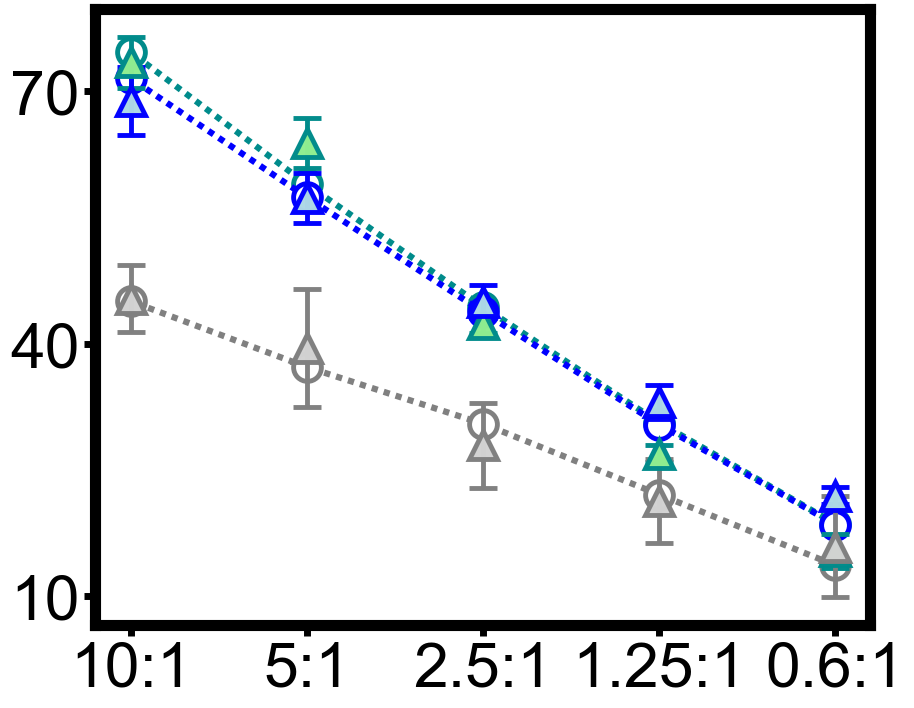

In [28]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
plt.plot(ET_ratio_num, res0[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0])#,label="Fit-Gen4")
plt.plot(ET_ratio_num, res0[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=lw,ls = ls[0])#,label="Fit-Gen2")
plt.plot(ET_ratio_num, res0[2], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=lw,ls = ls[0])#,label="Fit-WT")

plt.errorbar(ET_ratio_num, mean_Gen4_Kasumi1, yerr = sd_Gen4_Kasumi1, 
             fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan',alpha=0.99)#,label="data-Gen4")
plt.errorbar(ET_ratio_num, mean_Gen2_Kasumi1, yerr = sd_Gen2_Kasumi1, 
             fmt='^', markersize=m_size, markerfacecolor='lightblue', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue',alpha=0.99)#,label="data-Gen2")

plt.errorbar(ET_ratio_num, mean_WT_Kasumi1, yerr = sd_WT_Kasumi1, 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray',alpha=0.99)#,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
#plt.tight_layout(pad=2.5)
#plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('Kasumi1_Donor2_ET_vs_AvSpecificLysis_t_4h.png')
plt.show()

# Prediction HL60 Gen2 Gen4 by fitting WT

In [16]:
data_HL60_4h = pd.read_excel('Donor2_Av_Specific_Lysis_vs_ET.xlsx',dtype=object,sheet_name=1)
data_HL60_4h = data_HL60_4h.iloc[:,1:]
mean_WT_HL60, sd_WT_HL60 = new_data(data_HL60_4h[['Mean_WT','SD_WT']])
mean_Gen2_HL60, sd_Gen2_HL60 = new_data(data_HL60_4h[['Mean_CAR_NK_Gen2','SD_CAR_NK_Gen2']])
mean_Gen4_HL60, sd_Gen4_HL60 = new_data(data_HL60_4h[['Mean_CAR_NK_Gen4','SD_CAR_NK_Gen4']])

In [17]:
LB = np.array([1,1.5e-7])
UB = np.array([7.0e+3,1.e-4])


In [21]:
def main_HL60():
    Sys_CAR_Gen4.Cell_type_R_H(cell_type='HL60')
    Sys_CAR_Gen2.Cell_type_R_H(cell_type='HL60',mult=10)
    Sys_WT_NK.Cell_type_R_H(cell_type='HL60')
    x0 = [2340.6302964555534, 1.3421781612200636e-05]
    y0 = [0.14456244687582304, 0.13270956252482097, 898.2818582321386, 0.27588735351565585, 0.6836441142571017, 0.3384392456981237, 0.023869627288698254, 2.9227933752405552e-05]
    res1 = Model_Pred(x0,LB,UB,Sys_CAR_Gen4,Sys_CAR_Gen2,Sys_WT_NK,mean_Gen4_HL60,mean_Gen2_HL60,mean_WT_HL60,y0,fit=True)
    return res1

In [22]:
res1 = main_HL60()

[2340.6302964555534, 1.3421781612200636e-05]
WT cost 19356.058367869067
totl cost 35543.74445694297
[2340.630331333663, 1.3421781612200636e-05]
WT cost 19356.058175618473
totl cost 35543.7441175369
[2340.6302964555534, 1.3436682773394483e-05]
WT cost 19345.448104895146
totl cost 35515.95769479792
[3224.3993696923926, 2.5394676725317508e-05]
WT cost 9790.901436190588
totl cost 15875.446911201143
[3224.3994177396876, 2.5394676725317508e-05]
WT cost 9790.901270862445
totl cost 15875.446678045833
[3224.3993696923926, 2.5409577886511356e-05]
WT cost 9785.802379532644
totl cost 15865.17384138497
[4003.9742960539693, 3.842525850192103e-05]
WT cost 3842.4513956921082
totl cost 6597.554575358268
[4003.974355717836, 3.842525850192103e-05]
WT cost 3842.451189605081
totl cost 6597.554344547667
[4003.9742960539693, 3.844015966311488e-05]
WT cost 3840.3090704573897
totl cost 6593.858944225595
[4565.414918302079, 4.7967047672659714e-05]
WT cost 1590.724523704247
totl cost 3616.7472175202347
[4565.414

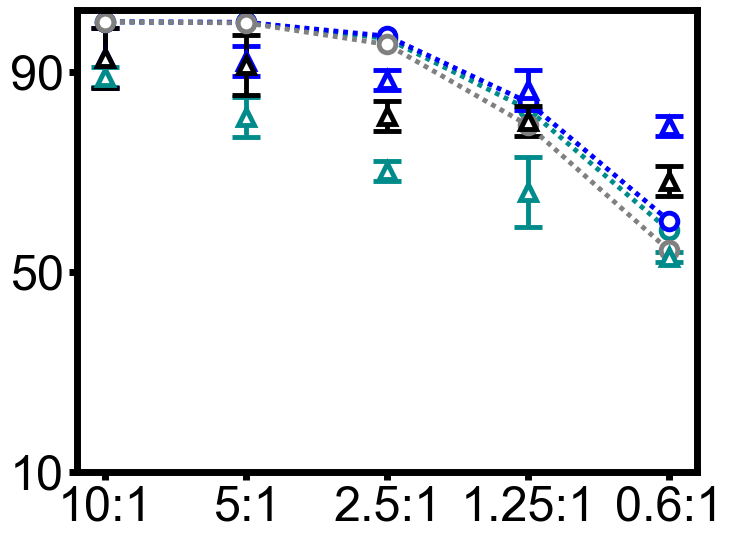

In [23]:
plt.figure(figsize=(8,6))
plt.rcParams['axes.linewidth'] = 5
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]

plt.errorbar(ET_ratio_num, mean_Gen4_HL60, yerr = sd_Gen4_HL60, 
             fmt='^', markersize=12, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='darkcyan')#,label="data-Gen4") 
plt.plot(ET_ratio_num, res1[0], marker='o', markersize=12, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=3.5,ls = ls[0])#,label="pred-Gen4")

plt.errorbar(ET_ratio_num, mean_Gen2_HL60, yerr = sd_Gen2_HL60, 
             fmt='^', markersize=12, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue')#,label="data-Gen2")
plt.plot(ET_ratio_num, res1[1], marker='o', markersize=12, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=3.5,ls = ls[0])#,label="pred-Gen2")

plt.errorbar(ET_ratio_num, mean_WT_HL60, yerr = sd_WT_HL60, 
             fmt='^', markersize=12, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='black',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='black')#,label="data-WT")
plt.plot(ET_ratio_num, res1[2], marker='o', markersize=12, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=3.5,ls = ls[0])#,label="Fit-WT")
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = 35)
plt.yticks([10,50,90],fontname="Arial",fontsize = 35)
#plt.tight_layout(pad=2.5)
#plt.legend(bbox_to_anchor=(1.05, 1))
#plt.legend(fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('HL60_Donor1_ET_vs_AvSpecificLysis_t_4h.png')
plt.show()

# Separate Figures

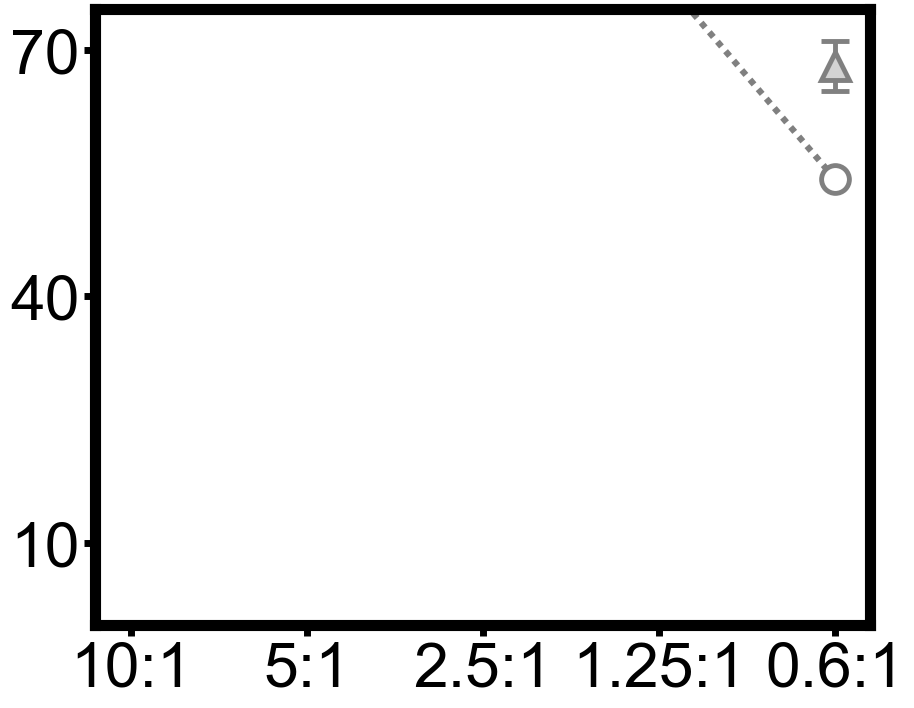

In [25]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
plt.plot(ET_ratio_num, res1[2], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='gray',color = 'gray',lw=lw,ls = ls[0])#,label="Fit-WT")
plt.errorbar(ET_ratio_num, mean_WT_HL60, yerr = sd_WT_HL60, 
             fmt='^', markersize=m_size, markerfacecolor='lightgray', markeredgewidth=3.5, markeredgecolor='gray',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='gray')#,label="data-WT")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size)
plt.yticks([10,40,70],fontname="Arial",fontsize = t_size)
plt.ylim(0,75)
#plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('HL60_WT_Donor2_ET_vs_AvSpecificLysis_t_4h.png')
plt.show()

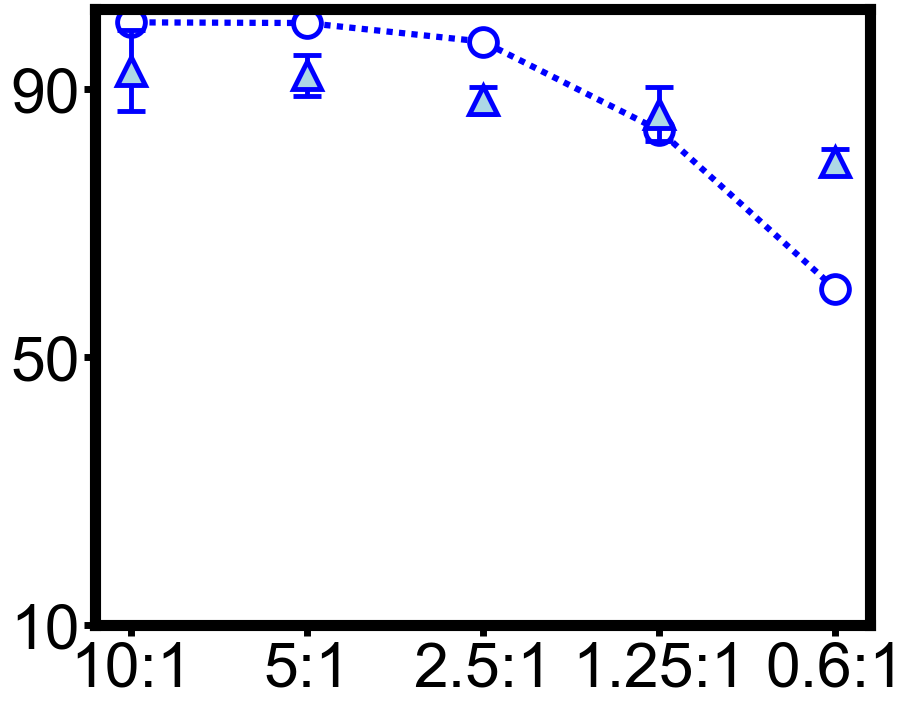

In [26]:
plt.figure(figsize=(10,8))
plt.rcParams['axes.linewidth'] = 8
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=19, length=8, width=5)
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
m_size = 20
lw = 4.5
#plt.plot(ET_ratio_num, res1[0], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='darkcyan',color = 'darkcyan',lw=lw,ls = ls[0])#,label="pred-Gen4")
plt.plot(ET_ratio_num, res1[1], marker='o', markersize=m_size, markerfacecolor='white', markeredgewidth=3.5, markeredgecolor='blue',color = 'blue',lw=lw,ls = ls[0])#,label="pred-Gen2")

# plt.errorbar(ET_ratio_num, mean_Gen4_HL60, yerr = sd_Gen4_HL60, 
#              fmt='^', markersize=m_size, markerfacecolor='lightgreen', markeredgewidth=3.5, markeredgecolor='darkcyan',
#              elinewidth=3.5, capsize=10, capthick=20,
#              ecolor='darkcyan')#,label="data-Gen4")
plt.errorbar(ET_ratio_num, mean_Gen2_HL60, yerr = sd_Gen2_HL60, 
             fmt='^', markersize=m_size, markerfacecolor='lightblue', markeredgewidth=3.5, markeredgecolor='blue',
             elinewidth=3.5, capsize=10, capthick=20,
             ecolor='blue')#,label="data-Gen2")
t_size = 45
plt.xticks(ET_ratio_num,ET_ratio,fontname="Arial",fontsize = t_size)
plt.yticks([10,50,90],fontname="Arial",fontsize = t_size)
#plt.legend(bbox_to_anchor=(0.95, 1),fontsize=17, loc='upper right', labelcolor='white')
plt.savefig('HL60_Pred_Donor2_ET_vs_AvSpecificLysis_t_4h.png')
plt.show()

# $R^2$ Analysis

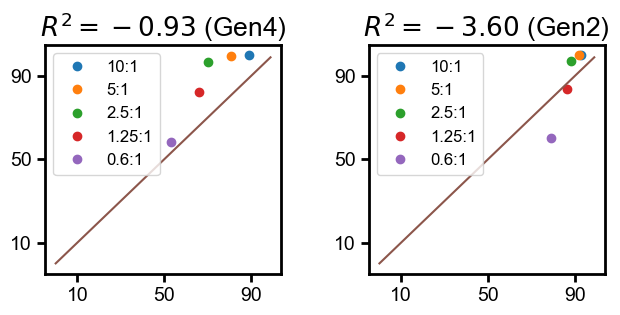

In [27]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 35
plt.rcParams['font.family'] = 'Arial'
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (7,4))

for i in range(len(res1[0])):
    ax1.plot(mean_Gen4_HL60[i], res1[0][i], 'o', label=f'{ET_ratio[i]}')
    ax2.plot(mean_Gen2_HL60[i], res1[1][i], 'o', label=f'{ET_ratio[i]}')

ax1.plot(np.arange(0,100),np.arange(0,100))
#ax1.set_xlabel('Data')
#ax1.set_ylabel('Prediction',fontsize =23)
ax1.set_xticks([10,50,90])
ax1.set_yticks([10,50,90])
ax1.set_title(f'$R^2 = {r2_score(mean_Gen4_HL60, res1[0]):.2f}$ (Gen4)',fontsize =19)
ax1.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax1.legend(prop = {'size':12})

ax2.plot(np.arange(0,100),np.arange(0,100))
#ax2.set_xlabel('Data')
#ax2.set_ylabel('Prediction',fontsize =25)
ax2.set_xticks([10,50,90])
ax2.set_yticks([10,50,90])
ax2.set_title(f'$R^2 = {r2_score(mean_Gen2_HL60, res1[1]):.2f}$ (Gen2)',fontsize =19)
ax2.tick_params(axis='both', which='major', labelsize=14, length=6,width=2)
ax2.legend(prop = {'size':12})
#plt.xlabel('x')
plt.tight_layout()
plt.savefig('R2_Donor2_CAN_NK_Pred.png')
plt.show()